# Chapter 3 - Linear Methods For Regression

## Section 3.1

* Largely developed in pre-computer age, but still useful, especially in cases of small training set or sparse data.
* Easy to interpret.
* Can be expanded in scope by applying transformation to features.

## Section 3.2

$f(X) = \beta_{0} + \sum_{j = 1}^{p} X_{j}*\beta_{j}$

Features can be

* Quantitative inputs
* Transformations of quantitative inputs (e.g. log)
* Basis expansion (e.g. $X_{2} = X_{1}^{2}, \ X_{3} = X{1}^3$)
* One-hot or dummy encoding of qualitative variables
* Interactions between variables (e.g. $X_{3} = X_{1}*X_{2}$)

While these new interaction or basis terms can be non-linear, the model is still linear in the parameters $\beta_{j}$.  However, these new terms can create a richer model than what is otherwise possible.

**Least squares** - method in which we pick the coefficients $\beta_{j}$ in order to minimize the RSS where $RSS = \sum_{i=1}^{N}(y_{i} - f(x_{i}))^2$ for N training points.

The coefficients $\beta_{j}$ are selected by minimizing the RSS function using calculus. The first derivative is taken and set = 0 and then the corresponding linear algebra is solved to obtain $\vec{\beta}$.

Residual vector $\hat{y} - y = (y-X\beta)$. Because $X^T(y-X\beta)=0$ from our minimization, the residual vector can be said to be orthogonal to the subspace spanned by $X$.  Thus $\hat{y}$ is the orthogonal projection of $y$ onto this subspace.

Redundant columns (e.g. those that are linearly dependent, i.e. a scalar multiple of others) can cause issues because then $X$ is not full rank and the math will not work out as expected.  There will be more than 1 solution to the equation.  Near linear independence can also cause difficulties with the optimization algorithms.

Rank deficiencies can also occur if the number of features is > number of training samples. 

In [1]:
import pandas
X = pandas.read_csv('./data/Chapter3/lung_cancer_features.csv', index_col=0)
y = pandas.read_csv('./data/Chapter3/lung_cancer_response.csv', index_col=0)

In [2]:
print('Feature shape: {0}'.format(X.shape))
print('Response shape: {0}'.format(y.shape))

# as you can see we have high dimensional data where # features > # training samples

Feature shape: (181, 12533)
Response shape: (181, 1)


In [3]:
# Curse of dimensionality formula
(1-0.5**(1.0/181))**(1.0/12533)

0.9995559173435511

In [4]:
# Correlation matrix on features
correlations = X.corr()

In [5]:
y

,response
1,mesothelioma
2,mesothelioma
3,mesothelioma
4,mesothelioma
5,mesothelioma
...,...
177,adenocarcinoma
178,adenocarcinoma
179,adenocarcinoma
180,adenocarcinoma


In [6]:
correlations

,1000_at,1001_at,1002_f_at,1003_s_at,1004_at,1005_at,1006_at,1007_s_at,1008_f_at,1009_at,...,989_at,990_at,991_g_at,992_at,993_at,994_at,995_g_at,996_at,998_s_at,999_at
1000_at,1.000000,-0.043401,-0.106262,-0.187240,-0.051083,-0.059817,0.026196,0.150805,-0.019221,-0.093804,...,-0.158659,0.055587,0.045566,0.015008,0.041214,-0.015864,0.045199,0.021438,0.038466,-0.094613
1001_at,-0.043401,1.000000,0.079289,0.037468,0.140561,0.283577,0.157358,-0.113356,0.258841,-0.184640,...,-0.281355,0.287193,0.226201,-0.044464,-0.207977,0.247879,0.274741,-0.144453,-0.186025,-0.105916
1002_f_at,-0.106262,0.079289,1.000000,0.084790,0.160398,-0.044737,-0.034900,0.073034,0.068408,0.040655,...,-0.080264,0.075682,0.108818,-0.038409,0.108815,0.101355,0.007600,0.050601,0.097334,-0.069340
1003_s_at,-0.187240,0.037468,0.084790,1.000000,-0.320351,0.100152,-0.059123,-0.237124,0.285958,0.129374,...,-0.009194,-0.077167,-0.242421,-0.095101,-0.211643,-0.051440,-0.140417,0.049930,-0.506415,-0.098000
1004_at,-0.051083,0.140561,0.160398,-0.320351,1.000000,0.048034,0.148798,0.151428,-0.257692,-0.096516,...,-0.201821,0.074393,0.240481,0.064276,0.098117,0.158331,0.128278,-0.145383,0.246493,-0.010224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994_at,-0.015864,0.247879,0.101355,-0.051440,0.158331,0.056327,0.054608,0.016592,0.101494,-0.150710,...,-0.097280,0.178722,0.043115,-0.000925,-0.012285,1.000000,0.768621,-0.042210,0.080972,-0.088436
995_g_at,0.045199,0.274741,0.007600,-0.140417,0.128278,0.179719,0.036542,-0.012366,-0.123745,-0.315493,...,-0.087849,0.034695,-0.018871,0.034726,0.082119,0.768621,1.000000,-0.142548,0.071190,0.077247
996_at,0.021438,-0.144453,0.050601,0.049930,-0.145383,-0.041597,-0.090716,0.011012,-0.035910,0.012591,...,0.060109,-0.018147,-0.053980,0.022772,-0.008240,-0.042210,-0.142548,1.000000,0.067519,-0.114431
998_s_at,0.038466,-0.186025,0.097334,-0.506415,0.246493,-0.043764,0.047183,0.077264,-0.265170,-0.001199,...,0.100336,-0.082022,0.112331,0.158404,0.206916,0.080972,0.071190,0.067519,1.000000,0.213583


In [7]:
import numpy as np

# Fill diagonal with np.nan because we don't care about self correlation
np.fill_diagonal(correlations.values, np.nan)
ranked_correlations = correlations.unstack().abs().sort_values(kind="quicksort", ascending=False)

In [8]:
print("Top 25 correlated features:")
ranked_correlations[0:25]

Top 25 correlated features:


769_s_at    31444_s_at    0.996305
31444_s_at  769_s_at      0.996305
33273_f_at  33274_f_at    0.996099
33274_f_at  33273_f_at    0.996099
38406_f_at  216_at        0.991874
216_at      38406_f_at    0.991874
41839_at    661_at        0.991816
661_at      41839_at      0.991816
1430_at     37782_at      0.991006
37782_at    1430_at       0.991006
41827_f_at  33274_f_at    0.990270
33274_f_at  41827_f_at    0.990270
33671_f_at  31960_f_at    0.989805
31960_f_at  33671_f_at    0.989805
38784_g_at  700_s_at      0.987599
700_s_at    38784_g_at    0.987599
39209_r_at  39208_i_at    0.987142
39208_i_at  39209_r_at    0.987142
31477_at    37897_s_at    0.986867
37897_s_at  31477_at      0.986867
35726_at    2027_at       0.985865
2027_at     35726_at      0.985865
36300_at    36299_at      0.985747
36299_at    36300_at      0.985747
37065_f_at  33671_f_at    0.985108
dtype: float64

In [9]:
# Feature matrix is rank deficient if it is not full rank
# Full rank means its rank = min(# of rows, # of columns)

rank = np.linalg.matrix_rank(X)
if (rank == min(X.shape[0], X.shape[1])):
    print('Full rank!')
else:
    print('Rank deficient!')

Full rank!


Using assumptions about the observations (namely independence and constant variance), we can form hypothesis tests and confidence intervals on the parameters $\hat{\beta}_j$. Constant variances means "different response variables have the same variance in their errors, regardless of the values of the predictor variables."  These tests are used to determine the importance of keeping certain variables in the model and how confident we are that our $\hat{\beta}_j$ is close to the real value. It is important to note that $\beta$ represents the population parameter while $\hat{\beta}$ represents a point estimate based on our *sample*. In general, you usually do not have complete info on the entire population. To have this info,  you would have to have an observation for every possible point in the feature space. This is why we perform these tests, "The least squares estimators are point estimates of the linear regression model parameters $\beta_j$. However, generally we also want to know how close those estimates might be to the true values of parameters."

If you want to test whether groups of variables (e.g. a one hot encoded variable) should be included in the model, you can use an F statistic. We can also use the same method to obtain a confidence estimate for the entire parameter vector. The F statistic measures the change in residual sum-of-squares per additional parameter in the bigger model.

**Example 3.2.1** 
When determining whether to drop the features "age, lcp, gleason, and pgg45" they calculate an F statistic. The null hypothesis is that the more complicated model is not significantly better than the less complicated one.  The F statistic corresponds to a p value of 0.17, and hence is not significant.  Thus, we do not reject the null hypothesis and we can use the simpler model.

**Section 3.2.2**
The Gauss-Markov theorem asserts that "Least squares estimates for $\beta$ have the smallest variance among all linear unbiased estimates". However, restricting to unbiased estimates is not necessarily wise. This will come into play with shrinkage/regularization methods, which trade some bias for large reduction in variance.

**Section 3.2.3**
With > 1 feature, this is called *multiple linear regression*.  When feature vectors are orthogonal, they have no effect on each other, but this almost never occurs with observation data.  However, we can use this in order to create an efficient algorithm for multiple linear regression. For orthogonal inputs, $\beta_j = \frac{<x_j, y>}{x_j, x_j}$ making the coefficients easy to compute. To orthogonalize the input space we can use the Gram-Schmidt process, which gives us a QR decomposition where Q and R represent the orthogonal and upper triangular matrices.


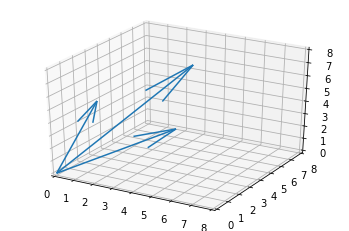

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

non_orthogonal = np.array([
    [1, 2, 5],
    [3, 7, 6],
    [5, 2, 4]
])

x,y,z = ((0,0,0), (0,0,0), (0,0,0))
u,v,w = zip(*non_orthogonal)

fig = plt.figure()
fig.clf()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(x,y,z,u,v,w)
ax.set_xlim([0, 8])
ax.set_ylim([0, 8])
ax.set_zlim([0, 8])
plt.show()

In [11]:
# Our vectors are not orthogonal because their dot products != 0
print(np.dot(u, v))
print(np.dot(u, w))
print(np.dot(v, w))

33
43
60


In [12]:
Q,R = np.linalg.qr(non_orthogonal)

In [13]:
# Q is orthogonal (we will verify later)
Q

array([[-0.16903085, -0.20777993, -0.96346047],
       [-0.50709255, -0.81988839,  0.2657822 ],
       [-0.84515425,  0.53348902,  0.03322277]])

In [14]:
# R is upper triangular
R

array([[-5.91607978, -5.57801808, -7.26832659],
       [ 0.        , -5.08780054, -3.82427391],
       [ 0.        ,  0.        , -3.08971805]])

In [15]:
# We have nearly 0 dot product between all vectors => orthogonal
u,v,w = zip(*Q)
print(np.dot(u, v))
print(np.dot(u, w))
print(np.dot(v, w))

-1.1102230246251565e-16
-5.898059818321144e-17
-3.469446951953614e-17


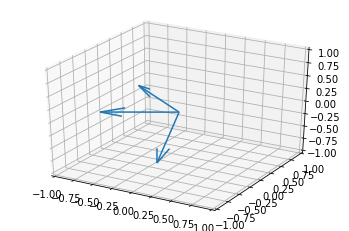

In [16]:
# Now, you can see our vectors are orthogonal
fig.clf()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(x,y,z,u,v,w)
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
plt.show()

**Section 3.2.4**
Multiple outputs does not change the problem much. Our RSS is just the sum of the RSS of the individual output regressions. However, if the errors between the outputs are correlated, it might be worthwile to modify the error function in favor of the multivariate version, which takes into account the co-variance matrix of the errors. However, it will have the same solution until we make the assumption that the covariance matrix varies between observation (i.e. not constant covariance).

## Section 3.3

Improvements to least-squares:
* Prediction accuracy - predictions often have low bias but large variance. Accuracy can be improved by shrinking some coefficients.

* Interpretation - large amount of predictors often hard to interpret. It is often worthwile to determine the smaller subset of predictors that exhibit the strongest effects.

**Section 3.3.1**
Best-subset selection finds the subset of size k that gives the smallest RSS.

In [17]:
# Load toy dataset from sklearn
from sklearn.datasets import load_diabetes
X,y = load_diabetes(return_X_y=True)

In [18]:
# Feature indices
feature_indices = range(X.shape[1])

In [19]:
# Generate possible subsets of size k=5
import itertools
subsets = list(itertools.combinations(feature_indices, 5))

In [20]:
# Have to check 252 subsets
print(len(subsets))

252


In [21]:
# Create a 67/33 split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [22]:
from sklearn.linear_model import LinearRegression

subset_rss = []

for subset in subsets:
    # Filter to subset of features
    X_train_subset = X_train[:, subset]
    X_test_subset = X_test[:, subset]

    # Create linear regression object
    lr = LinearRegression()

    # Train the model using the training sets
    lr.fit(X_train_subset, y_train)

    # Predict and compute RSS on test set
    predictions_test = lr.predict(X_test_subset)
    rss = np.mean((predictions_test - y_test) ** 2)
    
    subset_rss.append([rss, subset])

In [23]:
# RSS and subset indices ranked ascending
sorted_rss = sorted(subset_rss)
sorted_rss[0:100]

[[3089.077254505267, (1, 2, 3, 6, 8)],
 [3179.440717843419, (2, 3, 6, 7, 8)],
 [3201.012237371069, (1, 2, 3, 7, 8)],
 [3202.0885123941525, (1, 2, 3, 8, 9)],
 [3208.136508836399, (2, 3, 6, 8, 9)],
 [3212.9625445111797, (0, 2, 3, 6, 8)],
 [3220.31693490342, (0, 1, 2, 3, 8)],
 [3227.4693460433427, (1, 2, 3, 5, 8)],
 [3237.8204652439217, (1, 2, 3, 4, 8)],
 [3259.5219188395827, (0, 2, 3, 8, 9)],
 [3259.992269910702, (2, 3, 4, 5, 8)],
 [3268.374565877309, (2, 3, 7, 8, 9)],
 [3270.7775628189534, (0, 2, 3, 7, 8)],
 [3282.6162533372135, (2, 3, 4, 6, 8)],
 [3288.5818014105303, (2, 3, 5, 6, 8)],
 [3292.6428272387834, (1, 2, 6, 8, 9)],
 [3299.8522835523113, (1, 2, 6, 7, 8)],
 [3306.81707060353, (2, 3, 5, 8, 9)],
 [3309.5231768447507, (0, 2, 3, 5, 8)],
 [3324.6619904720014, (2, 3, 4, 8, 9)],
 [3328.9307910554016, (0, 2, 3, 4, 8)],
 [3329.903758878956, (2, 6, 7, 8, 9)],
 [3361.3179003300297, (2, 3, 4, 7, 8)],
 [3368.8423690627023, (1, 2, 7, 8, 9)],
 [3377.2568981056475, (0, 1, 2, 6, 8)],
 [3389.8255

**Section 3.3.2**

Rather than search through all possible subsets (which becomes computationally infeasible), we can seek an appropriate path through them.

*Forward-stepwise selection* starts with the intercept, then sequentially adds into the model the predictor that most improves the fit.  This can be efficient if we have done the Gram-Schmidt orthogonalization process to exploit the QR decomposition.  This is a greedy algorithm (meaning it uses local optimum in hopes of finding global). Compared to best-subset, this is a more constrained search so it will have lower variance and perhaps more bias.


*Backward-stepwise selection* starts with the full model and sequentially deletes the predictor that has the least impact on the fit. i.e. the one with the smallest Z-score.  Can only be used for N > p (number of samples > number of features).

Some software packages use a hybrid approach between the two, considering the best forward and backward moves at each step and select the "best" of the two.

For one-hot encoded variables, smart stepwise packages will add or drop whole groups at a time, taking proper account of their degrees-of-freedom.

*Forward-stagewise regression* - even more constrained than forward-stepwise. Start with only an intercept and all $\hat{\beta}$ initialized to 0. Then, identify the variable most correlated with the current residual.  Compute the univariate coefficient of the residual and the chocsen variable, then add it to the coefficient of the variable.  Repeat until no variables have any correlation with the residuals.  Inefficient algorithm that can pay dividends in high dimensional cases.

**sklearn and statsmodels packages do not have stepwise/stagewise algorithms out of the box**

For future: write these algorithms manually here.


**Section 3.3.4**

Cross-validation works by dividing the training data randomly into K equal parts (this can vary). The learning method is fit on (K-1)/K of the data and the prediction error is computed on the remaining 1/K.  This is then repeated for each "fold" of the data.  Afterwards, the K prediction error estimates are averaged.

## Section 3.4

Ridge/Lasso regression minimizes a penalized RSS.  The penalty is a function of the parameters $\beta$, and generally "shrinks" them so that no particular parameter is too large.  This controls the effect that any particular dimension can have on the final prediction.

Ridge = penalize the loss function by $\lambda\sum_{i=1}^{p}\beta_{i}^2$.

* $\lambda$ is known as the complexity parameter and can be tuned to control the amount of desired penalization.


* In standard least squares regression, correlated variables can each get a large coeficient with opposing signs (one large positive one large negative). Regularization methods help alleviate this problem.


* We normally standardize (i.e. scale and center) the input variables so variables are on even footing for contributing to the loss penalty.


* We leave the intercept out of the penalty term, so that the procedure does not depend on the origin chosen for Y.


* The intercept is estimated as the average of $Y$.  We then run the ridge regression on centered/normalized inputs.


* Original motivation behind Ridge - it adds a positive constant to the diagonal of $X^TX$ before inversion, making it non-singular even if it was not previously of full rank.


* With orthonormal inputs, the Ridge estimates are just scaled down values of the least squares estimates.


* Ridge regression can also be derived from a Bayesian framework.


* SVD - singular value decomposition. Very useful factorization of a matrix into $X = UDV^T$, where $U$ and $V$ are $N x p$ and $p$ x $p$ orthogonal matrices with the columns of $U$ spanning the column space of $X$, and the columns of $V$ spanning the row space. $D$ is a $p$ x $p$ diagonal matrix, with positive and decreasing values values on the diagonal $d_j$ (from upper left to lower right).  If one or more values of $D$ is 0, then $X$ is singular, meaning it cannot be inverted.


* With an SVD decomposition, Ridge solutions are $\sum_{j=1}^p u_j \frac{d_{j}^2}{d_{j}^2 + \lambda}u_{j}^Ty$.  Thus, it computes the coordinates of $y$ with respect to the orthonormal basis $U$, then shrinks them. Note that greater amount of shrinkage happens with smaller $d_{j}^2$. These have a correlation with the principal components of $X$. $z_1$ = $u_1d_1$ is the first principal component of $X$.  So Ridge regression shrinks the directions with least variance the most, and maintains the coefficients of those with variance (the top principal components).


* Assumption is that the response will tend to vary most in the directions of high variance of the inputs.


* The sum of the shrinkage factor $\sum_{j=1}^p \frac{d_{j}^2}{d_{j}^2 + \lambda}$, is called the **effective degrees of freedom** of the ridge regression.


* Penalty is often referred to as the L2 penalty in reflection of the L2 vector norm of the coefficients.

In [24]:
import pandas

# Load data, this set uses ? for nulls but we can pass that as an option to pandas
data = pandas.read_csv('./data/Chapter3/crime_data.csv', na_values='?')

In [25]:
# Define target and what features should be treated as categorical
target_column = 'ViolentCrimesPerPop'
categorical_features = ['state', 'county', 'community', 'communityname']

In [26]:
# Dummy encode categoricals
encoded_data = pandas.get_dummies(data, prefix=categorical_features, columns=categorical_features)

In [27]:
# Get feature columns from encoded data
feature_columns = [col for col in encoded_data if col not in ['fold', target_column]]

In [28]:
# Let's tune the hyper-parameter alpha, which corresponds to the aggressiveness of regularization
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import numpy as np

# We will compute test error for each alpha and each of the 10 folds and 100 alphas
alphas = np.linspace(0.01, 1, 100)
test_errors = np.zeros((10, 100))
test_variances = np.zeros((10, 100))
    
for i in range(1,11):
    # train = all but fold i. test = fold i
    X_train = encoded_data.loc[encoded_data.fold != i, feature_columns].values
    y_train = encoded_data.loc[encoded_data.fold != i, target_column].values
    X_test = encoded_data.loc[encoded_data.fold == i, feature_columns].values
    y_test = encoded_data.loc[encoded_data.fold == i, target_column].values

    # Impute on train and transform on train/test
    imp = SimpleImputer(strategy='mean')
    X_train_imputed = imp.fit_transform(X_train)
    X_test_imputed = imp.transform(X_test)

    # For each alpha, fit the model and compute the error and prediction variance
    for j in range(len(alphas)):
        ridge = Ridge(alpha=alphas[j], fit_intercept=True, normalize=False, copy_X=True, max_iter=None, 
                      tol=0.001, solver='auto', random_state=10)

        ridge.fit(X_train_imputed, y_train)
        predictions = ridge.predict(X_test_imputed)
        test_errors[i-1, j] = mean_squared_error(y_test, predictions)
        test_variances[i-1, j] = predictions.var()

In [29]:
# Take the mean error and variance along the folds
alpha_errors = test_errors.mean(axis=0)
alpha_variances = test_variances.mean(axis=0)

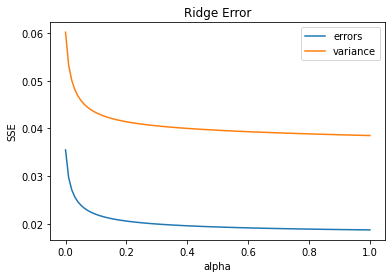

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.clf()
plt.plot(np.linspace(0,1,100), alpha_errors)
plt.plot(np.linspace(0,1,100), alpha_variances)
plt.title('Ridge Error')
plt.xlabel('alpha')
plt.ylabel('SSE')
plt.legend(['errors', 'variance'])

In [31]:
# Show effect of Ridge coefficient on one fold by comparing to Least Squares
X_train = encoded_data.loc[encoded_data.fold != 10, feature_columns].values
y_train = encoded_data.loc[encoded_data.fold != 10, target_column].values
X_test = encoded_data.loc[encoded_data.fold == 10, feature_columns].values
y_test = encoded_data.loc[encoded_data.fold == 10, target_column].values

imp = SimpleImputer(strategy='mean')
X_train_imputed = imp.fit_transform(X_train)
X_test_imputed = imp.transform(X_test)

# Compute full ridge with alpha = 1
ridge = Ridge(alpha=1, fit_intercept=True, normalize=False, copy_X=True, max_iter=None, 
              tol=0.001, solver='auto', random_state=10)
ridge.fit(X_train_imputed, y_train)
ridge_predictions = ridge.predict(X_test_imputed)
alpha1_coeff=ridge.coef_

# Compute least squares (equivalent to Ridge with alpha = 0)
ridge0 = LinearRegression(fit_intercept=True, normalize=False, copy_X=True)
ridge0.fit(X_train_imputed, y_train)
ls_coeff = ridge0.coef_

In [32]:
pandas.DataFrame(list(zip(alpha1_coeff, ls_coeff)), columns = ['Ridge', 'Least Squares'])

,Ridge,Least Squares
0,-0.043645,-1.054303
1,0.070931,-0.494987
2,0.007213,0.230165
3,-0.082213,0.052361
4,-0.029705,-0.306334
...,...,...
2858,0.102409,0.078977
2859,-0.065052,-0.109405
2860,-0.028612,-0.136661
2861,-0.011659,0.170971


Regularization improves the conditioning of the problem and reduces the variance of the estimates.

Lasso = penalize the loss function by $\lambda\sum_{i=1}^{p}|\beta_{i}|$.

* No closed form solution for Lasso. Computing the solution is a quadratic programming problem. 


* Some of the coefficients will be exactly 0, unlike Ridge.  This can make it be used as a continuous subset selection problem, and also for *feature reduction*.


* Penalty is often referred to as the L1 penalty in reflection of the L1 vector norm of the coefficients.

In [33]:
# Let's tune the hyper-parameter alpha, which corresponds to the aggressiveness of regularization
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
import numpy as np

# We will compute test error for each alpha and each of the 10 folds and 100 alphas
alphas = np.linspace(0.01, 1, 100)
test_errors = np.zeros((10, 100))
test_variances = np.zeros((10, 100))
    
for i in range(1,11):
    # train = all but fold i. test = fold i
    X_train = encoded_data.loc[encoded_data.fold != i, feature_columns].values
    y_train = encoded_data.loc[encoded_data.fold != i, target_column].values
    X_test = encoded_data.loc[encoded_data.fold == i, feature_columns].values
    y_test = encoded_data.loc[encoded_data.fold == i, target_column].values

    # Impute on train and transform on train/test
    imp = SimpleImputer(strategy='mean')
    X_train_imputed = imp.fit_transform(X_train)
    X_test_imputed = imp.transform(X_test)

    # For each alpha, fit the model and compute the error and predictino variance
    for j in range(len(alphas)):
        
        lasso = Lasso(alpha=alphas[j], fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, 
                      tol=0.0001, warm_start=False, 
                      positive=False, random_state=10, selection='cyclic')

        lasso.fit(X_train_imputed, y_train)
        predictions = lasso.predict(X_test_imputed)
        test_errors[i-1, j] = mean_squared_error(y_test, predictions)
        test_variances[i-1, j] = predictions.var()

In [34]:
# Take the mean error and variance along the folds
alpha_errors = test_errors.mean(axis=0)
alpha_variances = test_variances.mean(axis=0)

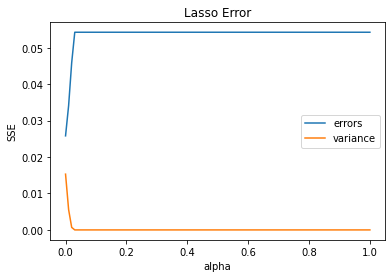

In [35]:
plt.clf()
plt.plot(np.linspace(0,1,100), alpha_errors)
plt.plot(np.linspace(0,1,100), alpha_variances)
plt.title('Lasso Error')
plt.xlabel('alpha')
plt.ylabel('SSE')
plt.legend(['errors', 'variance'])

In [36]:
l = Lasso(alpha=0.001, fit_intercept=True, normalize=False, precompute=False, copy_X=True, max_iter=1000, tol=0.0001, 
          warm_start=False, positive=False, random_state=None, selection='cyclic')

In [37]:
l.fit(X_train_imputed, y_train)
l.coef_

array([ 0.,  0., -0., ..., -0., -0., -0.])

In [38]:
lasso_predictions = l.predict(X_test_imputed)

In [39]:
# Number of non-zero coefficents
print('Number of non-zero coefficients: {0}'.format(len(l.coef_[l.coef_ != 0])))
print('Total number of features: {0}'.format(len(l.coef_)))

Number of non-zero coefficients: 27
Total number of features: 2863


In [40]:
pandas.DataFrame(list(zip(np.array(feature_columns)[np.array(l.coef_ != 0)], l.coef_[l.coef_ != 0])), 
                 columns = ['feature', 'coefficient'])

,feature,coefficient
0,agePct16t24,-0.035346
1,pctUrban,0.033075
2,pctWRetire,-0.060745
3,PersPerFam,0.074503
4,PctKids2Par,-0.667551
5,PctYoungKids2Par,-0.010601
6,PctPersDenseHous,0.075529
7,MedNumBR,0.006253
8,HousVacant,0.133451
9,PctHousOccup,-0.004092


Least Angle Regression (LAR)
1. Standardize the predictors to have mean zero and unit norm. Start with the residual $r=y-\bar{y}, \beta_j = 0$.
2. Find the predictor $x_j$ most correlated with $r$.
3. Move $\beta_j$ from 0 towards its least square coefficient until some other competitor $x_k$ has as much correlation with the current residual as does $x_j$.
4. Move $\beta_j$ and $\beta_k$ in the direction defined by their join least squares coefficient of the current residual until some other competitor has as much correlation with the current residual.
5. Continue until all $p$ predictors have been entered. After $min(N-1, p)$ steps, we arrive at the full least squares solution.


* The name "least angle" arises from the geometrical interpretation of the process. The new fit direction makes the smallest (and equal) angle with each of the predictors in the active set.


* LAR can be modified to include a lasso element -- if a non-zero coefficient hits zero, drop its variable from the active set of variables and recompute the current joint least squares direction.


* Effective degrees of freedom for traditional linear model = # of linearly independent feature vectors.  For adaptively fitted models (and can be applied to any general prediction), the definition is:
$df(\hat{y}) \frac{1}{\sigma^2}\sum_{i=1}^{N} Cov(\hat{y_i}, y_i)$.

In [41]:
from sklearn.linear_model import Lars

In [42]:
lars = Lars(fit_intercept=True, verbose=False, normalize=True, precompute='auto', n_nonzero_coefs=30, 
            eps=0.01, copy_X=True, fit_path=True)

In [43]:
lars.fit(X_train_imputed, y_train)
lars.coef_

array([0., 0., 0., ..., 0., 0., 0.])

In [44]:
lars_predictions = lars.predict(X_test_imputed)

In [45]:
# Number of non-zero coefficents
print('Number of non-zero coefficients: {0}'.format(len(lars.coef_[lars.coef_ != 0])))
print('Total number of features: {0}'.format(len(lars.coef_)))

Number of non-zero coefficients: 29
Total number of features: 2863


In [46]:
pandas.DataFrame(list(zip(np.array(feature_columns)[np.array(lars.coef_ != 0)], lars.coef_[lars.coef_ != 0])), 
                 columns = ['feature', 'coefficient'])

,feature,coefficient
0,pctUrban,2.020467e-02
1,PersPerFam,1.689546e-01
2,PctKids2Par,-7.821069e-01
3,PctLargHouseFam,-1.408916e+00
4,PctLargHouseOccup,1.173122e+00
5,PctPersDenseHous,2.419105e-01
6,HousVacant,1.595435e-01
7,PctVacantBoarded,7.542666e-02
8,NumInShelters,1.472550e-02
9,NumStreet,1.444477e-01


In [47]:
# Error comparison on test for fold = 1
print('Ridge MSE: {0}'.format(mean_squared_error(ridge_predictions, y_test)))
print('Lasso MSE: {0}'.format(mean_squared_error(lasso_predictions, y_test)))
print('LARS MSE: {0}'.format(mean_squared_error(lars_predictions, y_test)))

Ridge MSE: 0.016334366171554954
Lasso MSE: 0.015712497273211105
LARS MSE: 0.01603354580343012


## Section 3.5 - Derived Input Directions

**Principal Components**

* Using SVD, orthogonalize the input vectors and choose the top M with the most variance. What this amounts to is determining a basis for the input space (the eigenvectors) and using the associated singular values (which rank the corresponding directional variance in the basis) to select the derived input columns that best explain the variance.

* Then, we regress on the principal component vectors. Since these are orthogonal its just a sum of the univariate regressions.

* Principal components depend on the scaling of the inputs, so we standardize them first.

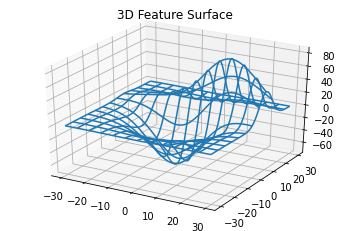

Text(0.5, 1.0, '2-D Projection')

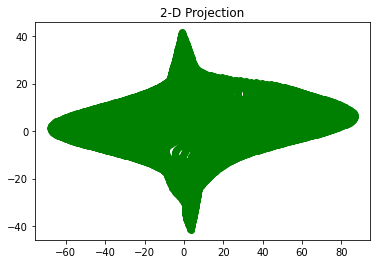

In [48]:
# Generate a 3D figure
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


fig = plt.figure()
fig.clear()
ax = fig.add_subplot(111, projection='3d')

# Grab some test data.
X, Y, Z = axes3d.get_test_data(0.05)

# Plot a basic wireframe.
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
plt.title("3D Feature Surface")
plt.show()

# convert the sample points in the surface to a typical design matrix
zipped = np.dstack((X,Y,Z))
design_matrix = zipped.reshape(-1,3)

from sklearn.decomposition import PCA
pca = PCA(n_components=2, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', 
          random_state=10)

components = pca.fit_transform(design_matrix)
plt.scatter(components[:, 0], components[:, 1], color='green')
plt.title("2-D Projection")

**Partial Least Squares**

* Also not scale-invariant.
* Uses both Y and X in its construction.

*Note for understanding algorithm:*
* When two vectors are unit length, their dot product represents "...what amount of one vector goes in the direction of another." For example, if you move a box at an angle to a horizontal vector, what amount if displaced in the horizontal direction for movement on the angled vector?  This is why orthogonal vectors have a dot product of 0.

* Since the $x_j$ are standardized, the first directions $\hat{\phi_{1j}}$ are the univariate regression coefficients. This is not the case for subsequent directions.

*Algorithm*
1. Standardized each $x_j$ to have mean zero and variance one.

2. For m = $1, 2, \dots, M$ where $M < p$:

    a) $z_m = \sum_{j=1}^{p} \hat{\phi_{mj}}x_{j}^{(m-1)}$, where $\hat{\phi_{mj}} = <x_{j}^{(m-1)}, y>$. This is the PLS input direction.
    
    b) $\hat{\theta_{(m)}} = <z_m, y>/<z_m, z_m>$.  This is the univariate regression coefficient of y with $z_m$.
    
    c) $\hat{y^{(m)}} = \hat{y^{(m-1)}} + \hat{\theta_{(m)}}z_m$.  Add to previous approximation this univarate directional improvement.
    
    d) Orthogonalize $x_{j}^{(m-1)}$ with respect to $z_m$: $x_{j}^{(m)} = x_{j}^{(m-1)} - [<z_m, x_{j}^{(m-1)}>/<z_m, z_m>] z_m, \ j = 1, 2, \dots p$.
       
3. Output the set of fitted values $\hat{y}^{(m)}$. $m = 1, \dots, M$


* PLS seeks directions that have high variance and high correlation with the response.


* If input matrix is orthogonal, PLS finds the least squares estimates after m=1 steps. Subsequent steps have no effect.


* Sequence of PLS coefficients represent the conjugate gradient sequence for computing the least squares solution. "In mathematics, the conjugate gradient method is an algorithm for the numerical solution of particular systems of linear equations, namely those whose matrix is symmetric and positive-definite."

In [50]:
# Use the same data prepared above. Fold = 1 of the crime data
from sklearn.cross_decomposition import PLSRegression
pls = PLSRegression(n_components=2, scale=True, max_iter=500, tol=1e-06, copy=True)

pls.fit(X_train_imputed, y_train)
pls_predictions = pls.predict(X_test_imputed)
print('PLS MSE: {0}'.format(mean_squared_error(pls_predictions, y_test)))

PLS MSE: 0.01930939036807998


**Comparison of methods**
* Ridge regression shrinks all directions, but shrinks low-variance directions more.
* Principal components regression leaves M high-variance directions alone and discards the rest.
* PLS tends to shrink low-variance directions but actually inflate some of the higher variances directions, making it a little unstable.
* For minimizing prediction error, Ridge regression is generally preferable to variable subset selection, PCR, and PLS. 
* Ridge shrinks smoothly, rather than in discrete steps like PLS and PCR. Lasso falls somewhere in between the two.

**Multiple Outcome Shrinkage**

* Techniques can be applied to each of the outcomes individually or all at the same time.

* Canonical correlation analysis (CCA) is the multiple output analog to PCA.  Finds uncorrelated input vectors and a corresponding sequence of uncorrelated linear combinations of the responses in order to maximize the squared correlation of the responses and inputs. This approach is formalized in *reduced ranked regression*.

**Incremental Forward Stagewise Regression**

*  Works just like LAR but updates to the $\beta_j$ are done by adding $\epsilon*sign[<x_k, r>]$ for a small step size $\epsilon$ at each iteration.


1. Start with the residual $r$ equal to to $y$ and $\beta_j = 0$.  Standardized inputs to be mean 0 and unit norm.

2. Find the predictor $x_j$ most correlated with $r$.

3. Update $\beta_j \leftarrow \beta_j + \delta_j$, where $\delta_j = \epsilon*sign[<x_k, r>]$ and $\epsilon > 0$ is a small step size, and set $r \leftarrow r - \delta_jx_j$.

4. Repeat steps 2 and 3 many times, until the residuals are uncorrelated with all the predictors.


* If we let $\epsilon$ approach 0, we call the limiting procedure *infintesimal forward stagewise regression*.  This is also sometimes referred to as L2boost because of its connections to boosting.

**Other algorithms**

* Piecewise-Linear Path Algorithms
    * Generalization of Lasso like algorithms but with different loss and and penalization functions.


* The Dantzig Selector
    * Resembles the Lasso but replaces the squared error loss with the maximum absolute value of its gradient.


* The Grouped Lasso
    * Allows you to regularize variables in groups. E.g. a group of one-hot encoded categoricals.

**Misc. Lasso Notes**
*  Estimates for $\beta$ are not consistent, meaning as sample size grows they do not necesarilly converge to the true values.

* One approach to reducing bias - run the Lasso to identify non-zero coefficients and then fit an non-regularized linear model to the non-zero predictors.

* If instead, we apply Lasso a second time this is known as the *relaxed Lasso*.

* *Smoothly clipped absolute deviation penalty* - replace the penalty function in Lasso so that large coefficients are shrunken less severely.

* *Adaptive lasso* - Uses a weight penalty function where the weight for each coefficient is proportional to the least squares estimate.

**Pathwise Coordinate Optimization**
* Alternative algorithm to the LARS algorithm for computing Lasso solution is to use simple coordinate descent. This can be faster for a large set of data.  It also returns the soultion of a grid of the hyper-parameter $\lambda$. Can also be used for elastic, grouped lasso, and other models for which the penalty is a sum of the individual $\beta_j$.


**Computation Considerations**
* Whether to use a Cholesky or QR decomposition for computing the least squares estimates depends on the relationship of N and p.  Depending on their releative side, there are tradeoffs of speed/stability/etc.